<a href="https://colab.research.google.com/github/debojit11/Deep_Learning_Pytorch/blob/main/basic_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) -->
  # output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [3]:
# Pick a manual seed for randomization
torch.manual_seed(32) # seed was 41 before
# Create an instance of model
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)

In [6]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [7]:
df['variety']= df['variety'].replace({'Setosa':0.0, 'Versicolor':1.0, 'Virginica':2.0})

<ipython-input-7-853488f7e1f0>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['variety']= df['variety'].replace({'Setosa':0.0, 'Versicolor':1.0, 'Virginica':2.0})


In [8]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [9]:
# train test split
X = df.drop('variety', axis=1).values
y = df['variety'].values

In [10]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32) # random state was 41 before

In [13]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [14]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [15]:
print(model.parameters)

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>


In [16]:
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # Compare predicted

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

   # print every 10 epoch
  if i % 10 == 0:
    print(f"Epoch: {i} and Loss: {loss}")

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and Loss: 1.1699321269989014
Epoch: 10 and Loss: 0.9570867419242859
Epoch: 20 and Loss: 0.7980871796607971
Epoch: 30 and Loss: 0.6327950358390808
Epoch: 40 and Loss: 0.43861737847328186
Epoch: 50 and Loss: 0.290453165769577
Epoch: 60 and Loss: 0.17780695855617523
Epoch: 70 and Loss: 0.11584118008613586
Epoch: 80 and Loss: 0.0893637090921402
Epoch: 90 and Loss: 0.07752915471792221


Text(0.5, 0, 'Epoch')

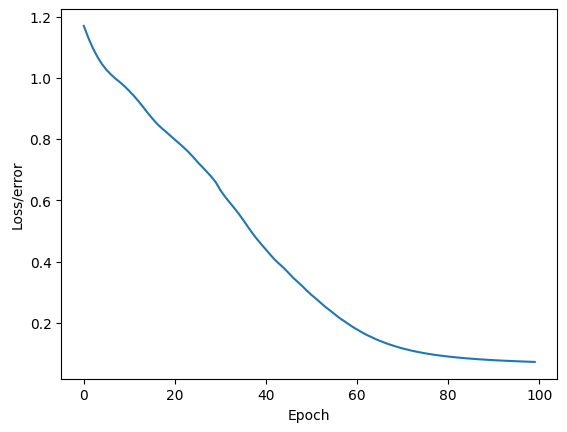

In [17]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("Loss/error")
plt.xlabel("Epoch")

In [18]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad():   #Basically turn off back propogation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error

In [19]:
loss

tensor(0.0538)

In [20]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'

    # Will tell us what type of flower class our network thinks it is
    print(f"{i+1} .) {str(y_val)} \t {x} \t {y_val.argmax().item()}")

    # correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'We got {correct} correct!')

1 .) tensor([-3.3646,  3.9392,  0.3720]) 	 Versicolor 	 1
2 .) tensor([  7.5572,   1.1015, -11.3347]) 	 Setosa 	 0
3 .) tensor([  6.5957,   1.5027, -10.4091]) 	 Setosa 	 0
4 .) tensor([-3.3331,  4.2594,  0.0623]) 	 Versicolor 	 1
5 .) tensor([-7.3782,  2.8087,  5.1605]) 	 Virginica 	 2
6 .) tensor([-7.3760,  3.9013,  4.2826]) 	 Virginica 	 2
7 .) tensor([  6.1971,   1.6470, -10.0047]) 	 Setosa 	 0
8 .) tensor([  6.6383,   1.4348, -10.4031]) 	 Setosa 	 0
9 .) tensor([-2.6753,  4.3091, -0.6392]) 	 Versicolor 	 1
10 .) tensor([  7.1875,   1.3812, -11.0965]) 	 Setosa 	 0
11 .) tensor([-3.8318,  4.4027,  0.5246]) 	 Versicolor 	 1
12 .) tensor([-8.6807,  1.9994,  6.8923]) 	 Virginica 	 2
13 .) tensor([-2.0678,  3.8200, -0.7571]) 	 Versicolor 	 1
14 .) tensor([-1.0768,  4.3741, -2.2838]) 	 Versicolor 	 1
15 .) tensor([-7.4965,  2.6207,  5.3287]) 	 Virginica 	 2
16 .) tensor([-8.6136,  1.5508,  7.1186]) 	 Virginica 	 2
17 .) tensor([-3.7761,  3.6462,  0.9487]) 	 Versicolor 	 1
18 .) tensor([-6

In [21]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [22]:
with torch.no_grad():
  print(model(new_iris))

tensor([  6.8839,   1.2461, -10.5586])


In [23]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])
with torch.no_grad():
  print(model(newer_iris))

tensor([-6.7321,  2.6617,  4.5484])


In [24]:
# save our NN model
torch.save(model.state_dict(), 'my_basic_nn_model.pt')

In [25]:
# Load the Saved Model
new_model = Model()
new_model.load_state_dict(torch.load('my_basic_nn_model.pt'))

<All keys matched successfully>

In [26]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)